In [1]:
import pandas
from loguru import logger
import ndf.download
from ndf.datamining import datamining
import warnings
import sys
import pandas as pd

warnings.simplefilter(action='ignore', category=FutureWarning)

log_level = 'ERROR'
logger.add(sys.stderr, format="{time} {level} {message}", filter="my_module", level=log_level)
# logger.add(sys.stdout, colorize=True, format="<green>{time}</green> <level>{message}</level>")
logger.add("ndfdownload.log", rotation="30 MB", level=log_level)

2

In [2]:
from datetime import datetime

a = datetime.now()
a.date()

datetime.date(2023, 5, 30)

In [3]:
logger.remove()

In [4]:
d = ndf.download.download()
d.download_all()

bgc ok
tradition ok
prebontullet ok
gfi ok


In [5]:
mining = datamining()

In [6]:
tulletprebon = mining.tulletprebon_calcs()
tulletprebon

,Total for human,Volume
Class,,
BMF1,537.9M,537900000
BMF2,334M,334000000
LONGER,30M,30000000
PTAX,1M,1000000
TOMPTAX,175M,175000000
TOTAL,1.53B,1527400000
XP,449.5M,449500000


In [7]:
bgc = mining.bgc_calcs()
bgc

,Total for human,Volume
Class,,
BMF,470.36M,470360000
BMF2,460M,460000000
BROKEN,1.5M,1500000
TOTAL,931.86M,931860000


In [8]:
tradition = mining.tradition_calcs()
tradition

C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


,Total for human,Volume
Class,,
TOTAL,0,0


In [9]:
gfi = mining.gfi_calcs()
gfi

,Total for human,Volume
Class,,
BMF,547.5M,547500000
BMF2,345M,345000000
BROKEN,4M,4000000
TOTAL,896.5M,896500000


In [10]:
tulletprebon['source'] = 'TulletPrebon'
tradition['source'] = 'Tradition'
bgc['source'] = 'bgc'
gfi['source'] = 'gfi'

In [11]:
tradition

,Total for human,Volume,source
Class,,,
TOTAL,0,0,Tradition


In [12]:
pd.DataFrame({'Class': ['TOTAL'], 'Total for human': [0], 'Volume': [0]}).set_index('Class')

,Total for human,Volume
Class,,
TOTAL,0,0


In [13]:
df_result = pd.concat([tulletprebon, tradition, bgc, gfi])
df_result

,Total for human,Volume,source
Class,,,
BMF1,537.9M,537900000,TulletPrebon
BMF2,334M,334000000,TulletPrebon
LONGER,30M,30000000,TulletPrebon
PTAX,1M,1000000,TulletPrebon
TOMPTAX,175M,175000000,TulletPrebon
TOTAL,1.53B,1527400000,TulletPrebon
XP,449.5M,449500000,TulletPrebon
TOTAL,0,0,Tradition
BMF,470.36M,470360000,bgc


In [14]:
df_totals = df_result.query('Class == "TOTAL"')
df_totals

,Total for human,Volume,source
Class,,,
TOTAL,1.53B,1527400000,TulletPrebon
TOTAL,0,0,Tradition
TOTAL,931.86M,931860000,bgc
TOTAL,896.5M,896500000,gfi


In [15]:
df_totals.groupby(['Class']).sum()

,Volume
Class,
TOTAL,3355760000


In [16]:
from numerize import numerize

market_total = df_totals.sum()['Volume']
market_total = numerize.numerize(float(market_total))
market_total

'3.36B'

In [17]:
summary = mining.market_summary()
summary

C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


,Total for human,Volume,source
Class,,,
TOTAL,1.53B,1527400000,TulletPrebon
TOTAL,0,0,Tradition
TOTAL,931.86M,931860000,bgc
TOTAL,896.5M,896500000,gfi


In [18]:
market_total = mining.market_total()
market_total

C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


'3.36B'

In [19]:
summary[['source', 'Total for human']]

,source,Total for human
Class,,
TOTAL,TulletPrebon,1.53B
TOTAL,Tradition,0
TOTAL,bgc,931.86M
TOTAL,gfi,896.5M


C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


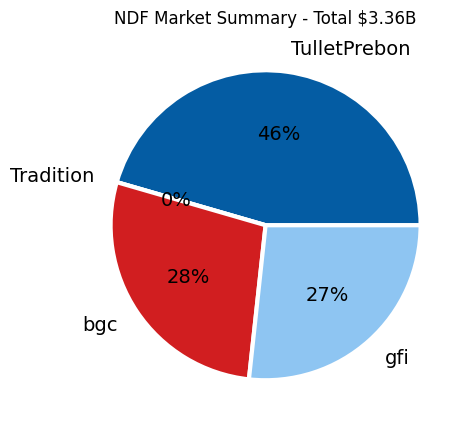

In [20]:
import matplotlib.pyplot as plt

market_total = mining.market_total()
summary = mining.market_summary()

colors = ['#045ca3', '#f5b12b', '#d11e20', '#8ec5f2']
fig = plt.figure(figsize=(5, 6))
plt.pie(summary['Volume'], labels=summary['source'], labeldistance=1.15, autopct='%1.0f%%',
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=colors,
        textprops={'fontsize': 14})
plt.title(f'NDF Market Summary - Total ${market_total}')
plt.savefig('pie.png', dpi=fig.dpi, bbox_inches='tight')


In [21]:
mining.market_total()

C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


'3.36B'

In [22]:
mining.market_summary()

C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


,Total for human,Volume,source
Class,,,
TOTAL,1.53B,1527400000,TulletPrebon
TOTAL,0,0,Tradition
TOTAL,931.86M,931860000,bgc
TOTAL,896.5M,896500000,gfi


C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


True

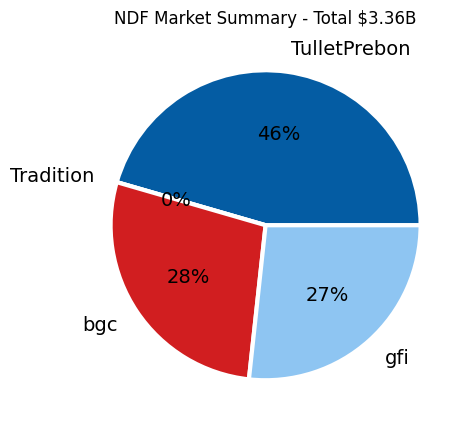

In [23]:
mining.generate_chart()